In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
#from rydbperc.cython_utilities import util
import numpy as np

In [2]:
N_points = 1000
shape = [1,1,1]
clu = ryperc.cluster3D(N_points, shape, distribution="gaussian", MOT_radius=10)

In [10]:
KDTree = clu.KDT
KDTree.data[[700,707,702,703]]

array([[-0.23321923,  0.03149135, -0.28192285],
       [-0.07090378, -0.09804307,  0.21765608],
       [-0.1705733 , -0.1880076 , -0.15401103],
       [ 0.14309604,  0.31341095, -0.39854603]])

In [8]:
radius = 0.1
delta_r = 0.02
in_the_shell = set(KDTree.query_ball_point(KDTree.data[700],0.1)).difference(set(KDTree.query_ball_point(KDTree.data[700],0.1-delta_r)))
in_the_shell

{308, 604}

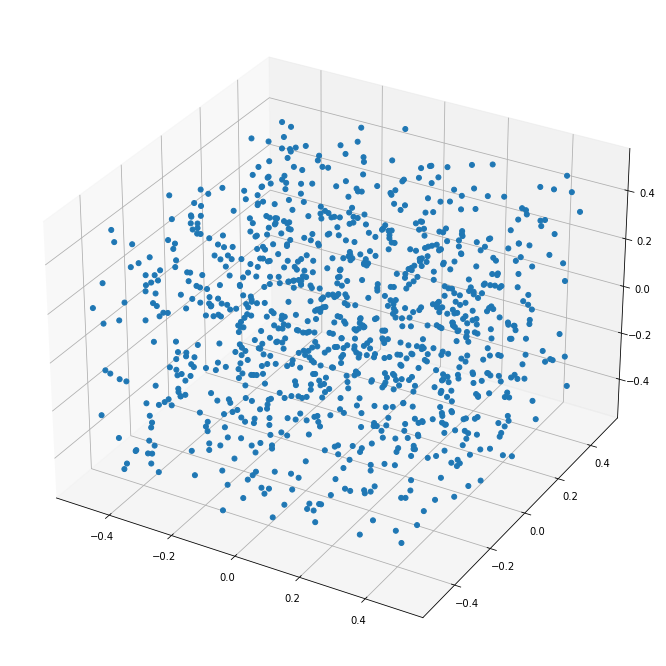

In [5]:
clu.show()

In [12]:
list(np.random.choice([0,1,2,5,4,7,2,4,3,7],5))

[2, 2, 4, 5, 2]

In [13]:
list(set([3,5,2,4,3,2,4,43,3,2,45,4,3,6]))

[2, 3, 4, 5, 6, 43, 45]